# Exploratory Data Analysis

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import Normalizer
from sklearn.kernel_ridge import KernelRidge

In [43]:
# list current working directory
! ls

LICENSE                         exploratory_data_analysis.ipynb
README.md                       models.py
__pycache__                     parse.py
data                            reviews
docs                            text_analysis.py


In [44]:
! python3 parse.py

In [45]:
data = pd.read_csv('data/listings_cleansed.csv')

In [46]:
data.head()

,Unnamed: 0,host_is_superhost,host_total_listings_count,neighbourhood,property_type,room_type,accommodates,bathrooms,bedrooms,beds,...,single level home,cleaning before checkout,wide hallway clearance,pets live on this property,hot tub,elevator in building,hot water,table corner guards,waterfront,free parking on street
0,0,f,3.0,West Queen Anne,Apartment,Entire home/apt,4.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,1,t,6.0,West Queen Anne,Apartment,Entire home/apt,4.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,2,f,2.0,West Queen Anne,House,Entire home/apt,11.0,4.5,5.0,7.0,...,0,0,0,1,1,0,0,0,0,0
3,3,f,1.0,West Queen Anne,Apartment,Entire home/apt,3.0,1.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
4,4,f,2.0,West Queen Anne,House,Entire home/apt,6.0,2.0,3.0,3.0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
# drop 'Unnamed: 0' and 'id'
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [48]:
data.head()

,host_is_superhost,host_total_listings_count,neighbourhood,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,...,single level home,cleaning before checkout,wide hallway clearance,pets live on this property,hot tub,elevator in building,hot water,table corner guards,waterfront,free parking on street
0,f,3.0,West Queen Anne,Apartment,Entire home/apt,4.0,1.0,1.0,1.0,Real Bed,...,0,0,0,0,0,0,0,0,0,0
1,t,6.0,West Queen Anne,Apartment,Entire home/apt,4.0,1.0,1.0,1.0,Real Bed,...,0,0,0,0,0,0,0,0,0,0
2,f,2.0,West Queen Anne,House,Entire home/apt,11.0,4.5,5.0,7.0,Real Bed,...,0,0,0,1,1,0,0,0,0,0
3,f,1.0,West Queen Anne,Apartment,Entire home/apt,3.0,1.0,0.0,2.0,Real Bed,...,0,0,0,0,0,0,0,0,0,0
4,f,2.0,West Queen Anne,House,Entire home/apt,6.0,2.0,3.0,3.0,Real Bed,...,0,0,0,0,0,0,0,0,0,0


In [49]:
for c in data.columns:
    print('feature name:', c)
    print('category number:', data[c].value_counts().shape[0], '\n')

feature name: host_is_superhost
category number: 2 

feature name: host_total_listings_count
category number: 41 

feature name: neighbourhood
category number: 262 

feature name: property_type
category number: 26 

feature name: room_type
category number: 3 

feature name: accommodates
category number: 16 

feature name: bathrooms
category number: 14 

feature name: bedrooms
category number: 10 

feature name: beds
category number: 15 

feature name: bed_type
category number: 5 

feature name: price
category number: 381 

feature name: guests_included
category number: 17 

feature name: minimum_nights
category number: 41 

feature name: number_of_reviews
category number: 245 

feature name: review_scores_rating
category number: 49 

feature name: cancellation_policy
category number: 3 

feature name: reviews_per_month
category number: 762 

feature name: patio or balcony
category number: 2 

feature name: heating
category number: 2 

feature name: tv
category number: 2 

feature name:

In [50]:
# visualize binary features
for c in data.columns:
    if len(data[c].value_counts()) == 2:
        print('feature name:', c)
        print(data[c].value_counts(), '\n')

feature name: host_is_superhost
f    11246
t     2399
Name: host_is_superhost, dtype: int64 

feature name: patio or balcony
0    13505
1      140
Name: patio or balcony, dtype: int64 

feature name: heating
1    12886
0      759
Name: heating, dtype: int64 

feature name: tv
1    9054
0    4591
Name: tv, dtype: int64 

feature name: pets allowed
0    12028
1     1617
Name: pets allowed, dtype: int64 

feature name: baby bath
0    13622
1       23
Name: baby bath, dtype: int64 

feature name: carbon monoxide detector
1    8764
0    4881
Name: carbon monoxide detector, dtype: int64 

feature name: wide doorway
0    13551
1       94
Name: wide doorway, dtype: int64 

feature name: luggage dropoff allowed
0    13399
1      246
Name: luggage dropoff allowed, dtype: int64 

feature name: children’s dinnerware
0    13609
1       36
Name: children’s dinnerware, dtype: int64 

feature name: oven
0    13116
1      529
Name: oven, dtype: int64 

feature name: babysitter recommendations
0    1357

0    7977
1    5668
Name: hangers, dtype: int64 

feature name: game console
0    13598
1       47
Name: game console, dtype: int64 

feature name: outlet covers
0    13610
1       35
Name: outlet covers, dtype: int64 

feature name: step-free access
0    13499
1      146
Name: step-free access, dtype: int64 

feature name: cooking basics
0    13101
1      544
Name: cooking basics, dtype: int64 

feature name: buzzer/wireless intercom
0    10155
1     3490
Name: buzzer/wireless intercom, dtype: int64 

feature name: iron
0    8832
1    4813
Name: iron, dtype: int64 

feature name: single level home
0    13568
1       77
Name: single level home, dtype: int64 

feature name: cleaning before checkout
0    13604
1       41
Name: cleaning before checkout, dtype: int64 

feature name: wide hallway clearance
0    13563
1       82
Name: wide hallway clearance, dtype: int64 

feature name: pets live on this property
0    11222
1     2423
Name: pets live on this property, dtype: int64 

feature 

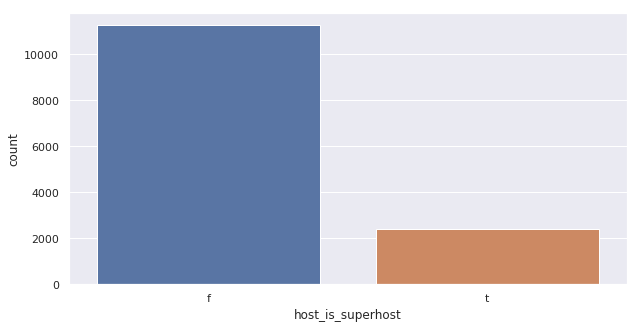

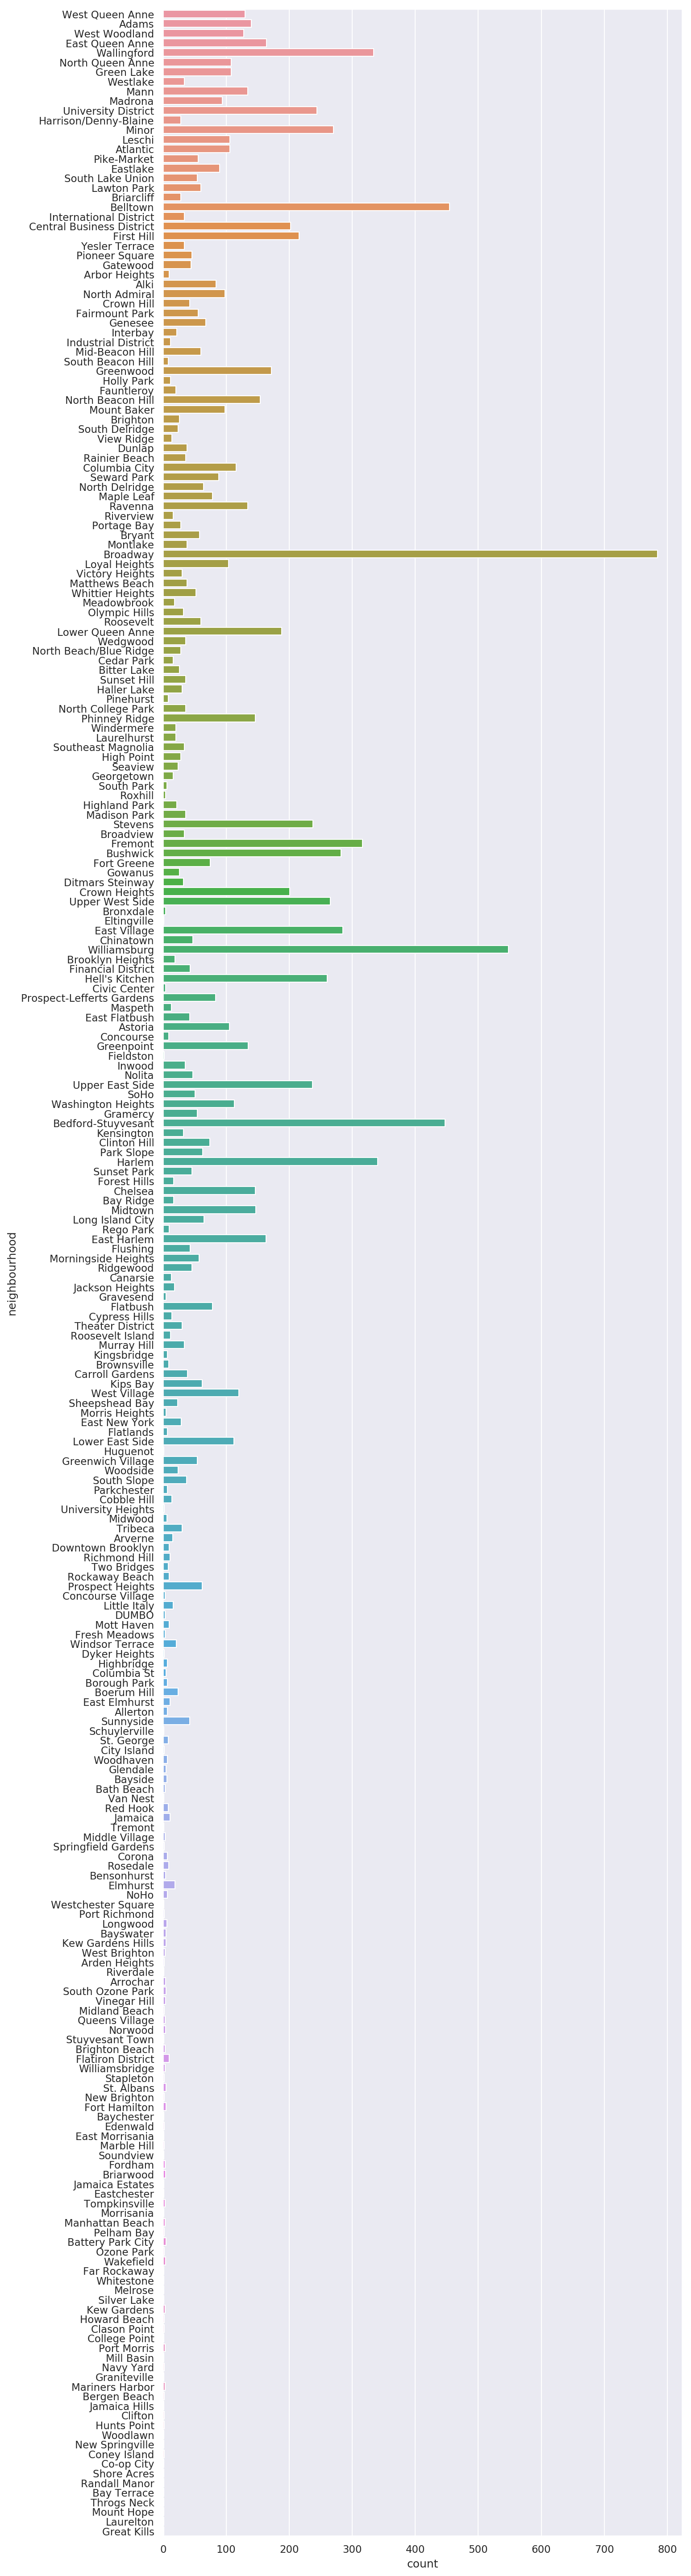

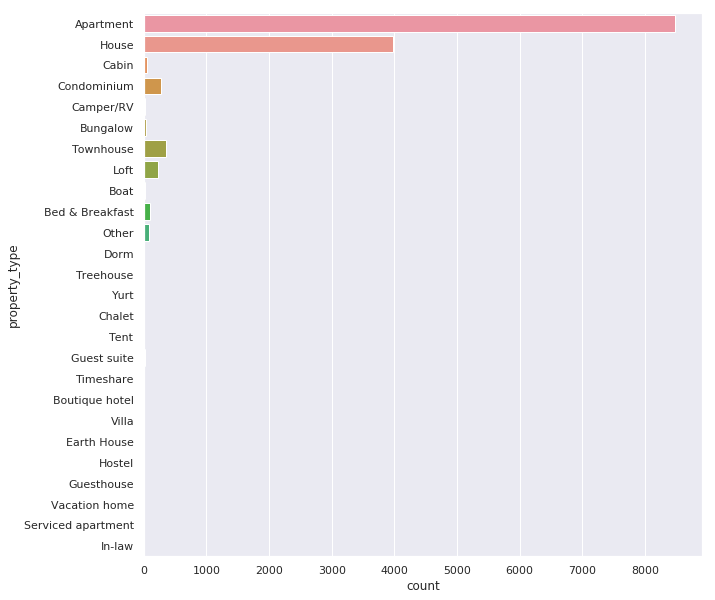

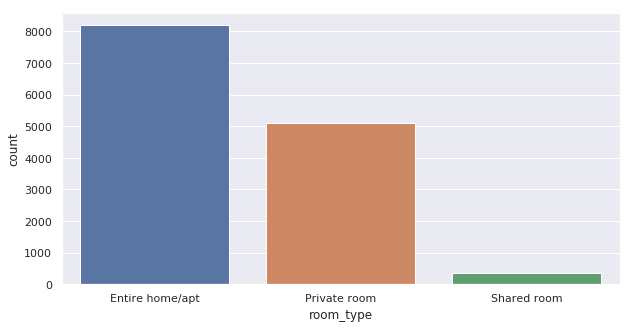

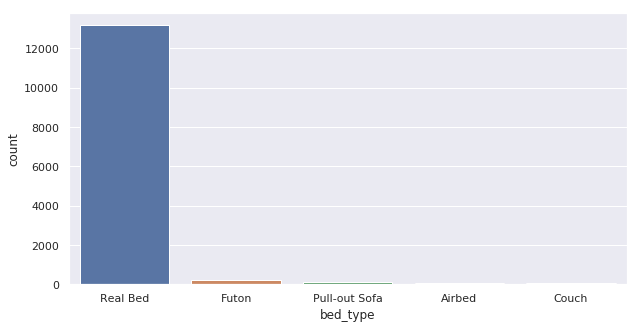

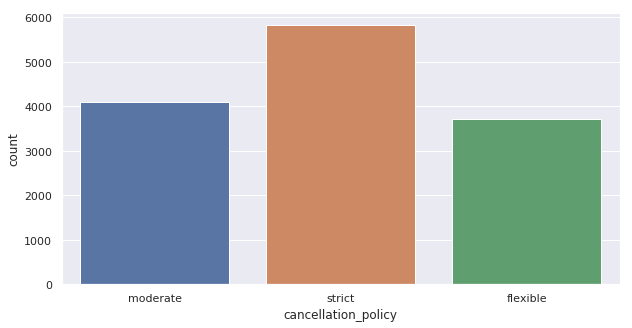

['host_is_superhost', 'neighbourhood', 'property_type', 'room_type', 'bed_type', 'cancellation_policy']


In [51]:
sns.set(style="darkgrid")

columns = []

for c in data.select_dtypes(include=[object]).columns:
    columns.append(c)
    if len(set(data[c])) > 50:
        plt.figure(figsize=(10,50), dpi=150)
        ax = sns.countplot(y=c, data=data)
    elif 10 < len(set(data[c])) < 50:
        plt.figure(figsize=(10,10))
        ax = sns.countplot(y=c, data=data)
    else:
        plt.figure(figsize=(10,5))
        ax = sns.countplot(x=c, data=data)
    plt.show()

print(columns)

In [52]:
columns_to_binarize = columns
data[columns_to_binarize].head()

,host_is_superhost,neighbourhood,property_type,room_type,bed_type,cancellation_policy
0,f,West Queen Anne,Apartment,Entire home/apt,Real Bed,moderate
1,t,West Queen Anne,Apartment,Entire home/apt,Real Bed,strict
2,f,West Queen Anne,House,Entire home/apt,Real Bed,strict
3,f,West Queen Anne,Apartment,Entire home/apt,Real Bed,flexible
4,f,West Queen Anne,House,Entire home/apt,Real Bed,strict


In [53]:
one_hot_encoding = pd.get_dummies(data[columns_to_binarize])
one_hot_encoding.head()

,host_is_superhost_f,host_is_superhost_t,neighbourhood_Adams,neighbourhood_Alki,neighbourhood_Allerton,neighbourhood_Arbor Heights,neighbourhood_Arden Heights,neighbourhood_Arrochar,neighbourhood_Arverne,neighbourhood_Astoria,...,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [54]:
data = pd.concat([data, one_hot_encoding], axis=1)
data.head()

,host_is_superhost,host_total_listings_count,neighbourhood,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,...,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,f,3.0,West Queen Anne,Apartment,Entire home/apt,4.0,1.0,1.0,1.0,Real Bed,...,0,0,0,0,0,0,1,0,1,0
1,t,6.0,West Queen Anne,Apartment,Entire home/apt,4.0,1.0,1.0,1.0,Real Bed,...,0,0,0,0,0,0,1,0,0,1
2,f,2.0,West Queen Anne,House,Entire home/apt,11.0,4.5,5.0,7.0,Real Bed,...,0,0,0,0,0,0,1,0,0,1
3,f,1.0,West Queen Anne,Apartment,Entire home/apt,3.0,1.0,0.0,2.0,Real Bed,...,0,0,0,0,0,0,1,1,0,0
4,f,2.0,West Queen Anne,House,Entire home/apt,6.0,2.0,3.0,3.0,Real Bed,...,0,0,0,0,0,0,1,0,0,1


In [55]:
data.drop(columns_to_binarize, axis=1, inplace=True)

In [56]:
sorted(list(data.columns))

[' smooth pathway to front door',
 '24-hour check-in',
 'accessible-height bed',
 'accessible-height toilet',
 'accommodates',
 'air conditioning',
 'air purifier',
 'baby bath',
 'baby monitor',
 'babysitter recommendations',
 'bathrooms',
 'bathtub',
 'bathtub with shower chair',
 'bbq grill',
 'beach essentials',
 'beachfront',
 'bed linens',
 'bed_type_Airbed',
 'bed_type_Couch',
 'bed_type_Futon',
 'bed_type_Pull-out Sofa',
 'bed_type_Real Bed',
 'bedrooms',
 'beds',
 'breakfast',
 'buzzer/wireless intercom',
 'cable tv',
 'cancellation_policy_flexible',
 'cancellation_policy_moderate',
 'cancellation_policy_strict',
 'carbon monoxide detector',
 'cat(s)',
 'changing table',
 'children’s books and toys',
 'children’s dinnerware',
 'cleaning before checkout',
 'coffee maker',
 'cooking basics',
 'crib',
 'disabled parking spot',
 'dishes and silverware',
 'dishwasher',
 'dog(s)',
 'doorman',
 'dryer',
 'elevator',
 'elevator in building',
 'essentials',
 'ethernet connection',
 'ev

In [69]:
y = data['price']
X = data.drop(['price'], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [70]:
X.shape

(13645, 427)

## Generalized Linear Models

In [71]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(normalize=True, n_jobs=-1).fit(X, y)
reg.score(X, y)

0.3584929154597938

In [82]:
from sklearn.linear_model import ElasticNet
r_reg = ElasticNet(l1_ratio=0.5, random_state=0).fit(X, y)
r_reg.score(X, y)

0.2571001777968821

In [75]:
np.sqrt(427)

20.663978319771825

## Random Forest Regressor

In [72]:
%%time
from sklearn.ensemble import RandomForestRegressor
# regularization
rf = RandomForestRegressor(n_estimators=300, criterion='mae', max_features='sqrt', max_depth=None, n_jobs=-1)
rf.fit(X_train, y_train)

CPU times: user 17min 19s, sys: 2.95 s, total: 17min 22s
Wall time: 1min 33s


In [73]:
print('training R^2 score:', rf.score(X_train, y_train))
print('test R^2 score:    ', rf.score(X_test, y_test))

training R^2 score: 0.8624588873676226
test R^2 score:     0.6054832750818961


In [74]:
# %%time
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(clf, X, y, cv=5)
# print('scores:', scores)
# print('average score:', np.mean(scores))

In [127]:
%%time
# best benchmark with regularization
rf_trial = RandomForestRegressor(n_estimators=300, criterion='mae', 
                                  max_features=50, max_depth=None, 
                                  n_jobs=-1, oob_score=True)
rf_trial.fit(X_train, y_train)

CPU times: user 41min 32s, sys: 7.13 s, total: 41min 39s
Wall time: 3min 49s


In [128]:
print('training R^2 score:', rf_trial.score(X_train, y_train))
print('test R^2 score:    ', rf_trial.score(X_test, y_test))

training R^2 score: 0.8769221793564499
test R^2 score:     0.625695950603923


In [76]:
%%time
# no regularization
rf_full = RandomForestRegressor(n_estimators=300, criterion='mae', 
                                  max_features='auto', max_depth=None, 
                                  n_jobs=-1, oob_score=True)
rf_full.fit(X_train, y_train)

CPU times: user 5h 12min 18s, sys: 36.4 s, total: 5h 12min 55s
Wall time: 27min 55s


In [77]:
print('training R^2 score:', rf_full.score(X_train, y_train))
print('test R^2 score:    ', rf_full.score(X_test, y_test))

training R^2 score: 0.9092160428074348
test R^2 score:     0.5543475994728394


In [ ]:
# %%time
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(clf, X, y, cv=5)
# print('scores:', scores)
# print('average score:', np.mean(scores))

## LigthGBM

In [85]:
import lightgbm as lgb

/usr/local/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [86]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [154]:
params = {
    'boosting_type': 'dart',
    'objective': 'regression',
    'num_iterations': 200,
    'metric': {'l2', 'l1'},
    'num_leaves': 50,
    'learning_rate': 0.1,
    'verbose': 0
}

In [155]:
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=lgb_eval,
                early_stopping_rounds=10)

[1]	valid_0's l2: 11722.9	valid_0's l1: 63.686
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's l2: 10853.5	valid_0's l1: 60.1972
[3]	valid_0's l2: 10177.3	valid_0's l1: 57.3461
[4]	valid_0's l2: 9567.83	valid_0's l1: 54.7679
[5]	valid_0's l2: 9092.96	valid_0's l1: 52.5639
[6]	valid_0's l2: 8684.78	valid_0's l1: 50.8047
[7]	valid_0's l2: 8294.7	valid_0's l1: 49.1276
[8]	valid_0's l2: 8463.45	valid_0's l1: 49.9202
[9]	valid_0's l2: 8152.26	valid_0's l1: 48.5183
[10]	valid_0's l2: 7862.69	valid_0's l1: 47.2036
[11]	valid_0's l2: 7645	valid_0's l1: 46.18
[12]	valid_0's l2: 7736.01	valid_0's l1: 46.639
[13]	valid_0's l2: 7529.43	valid_0's l1: 45.6418
[14]	valid_0's l2: 7331.64	valid_0's l1: 44.781
[15]	valid_0's l2: 7167.49	valid_0's l1: 44.0847
[16]	valid_0's l2: 7047.51	valid_0's l1: 43.4482
[17]	valid_0's l2: 6958.75	valid_0's l1: 42.9659
[18]	valid_0's l2: 6857.3	valid_0's l1: 42.5088
[19]	valid_0's l2: 6741.68	valid_0's l1: 42.0498
[20]	valid_0's l2: 6652.31

In [156]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

In [157]:
from sklearn.metrics import mean_squared_error
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)

The rmse of prediction is: 79.7935571388271


In [158]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5011570026641704

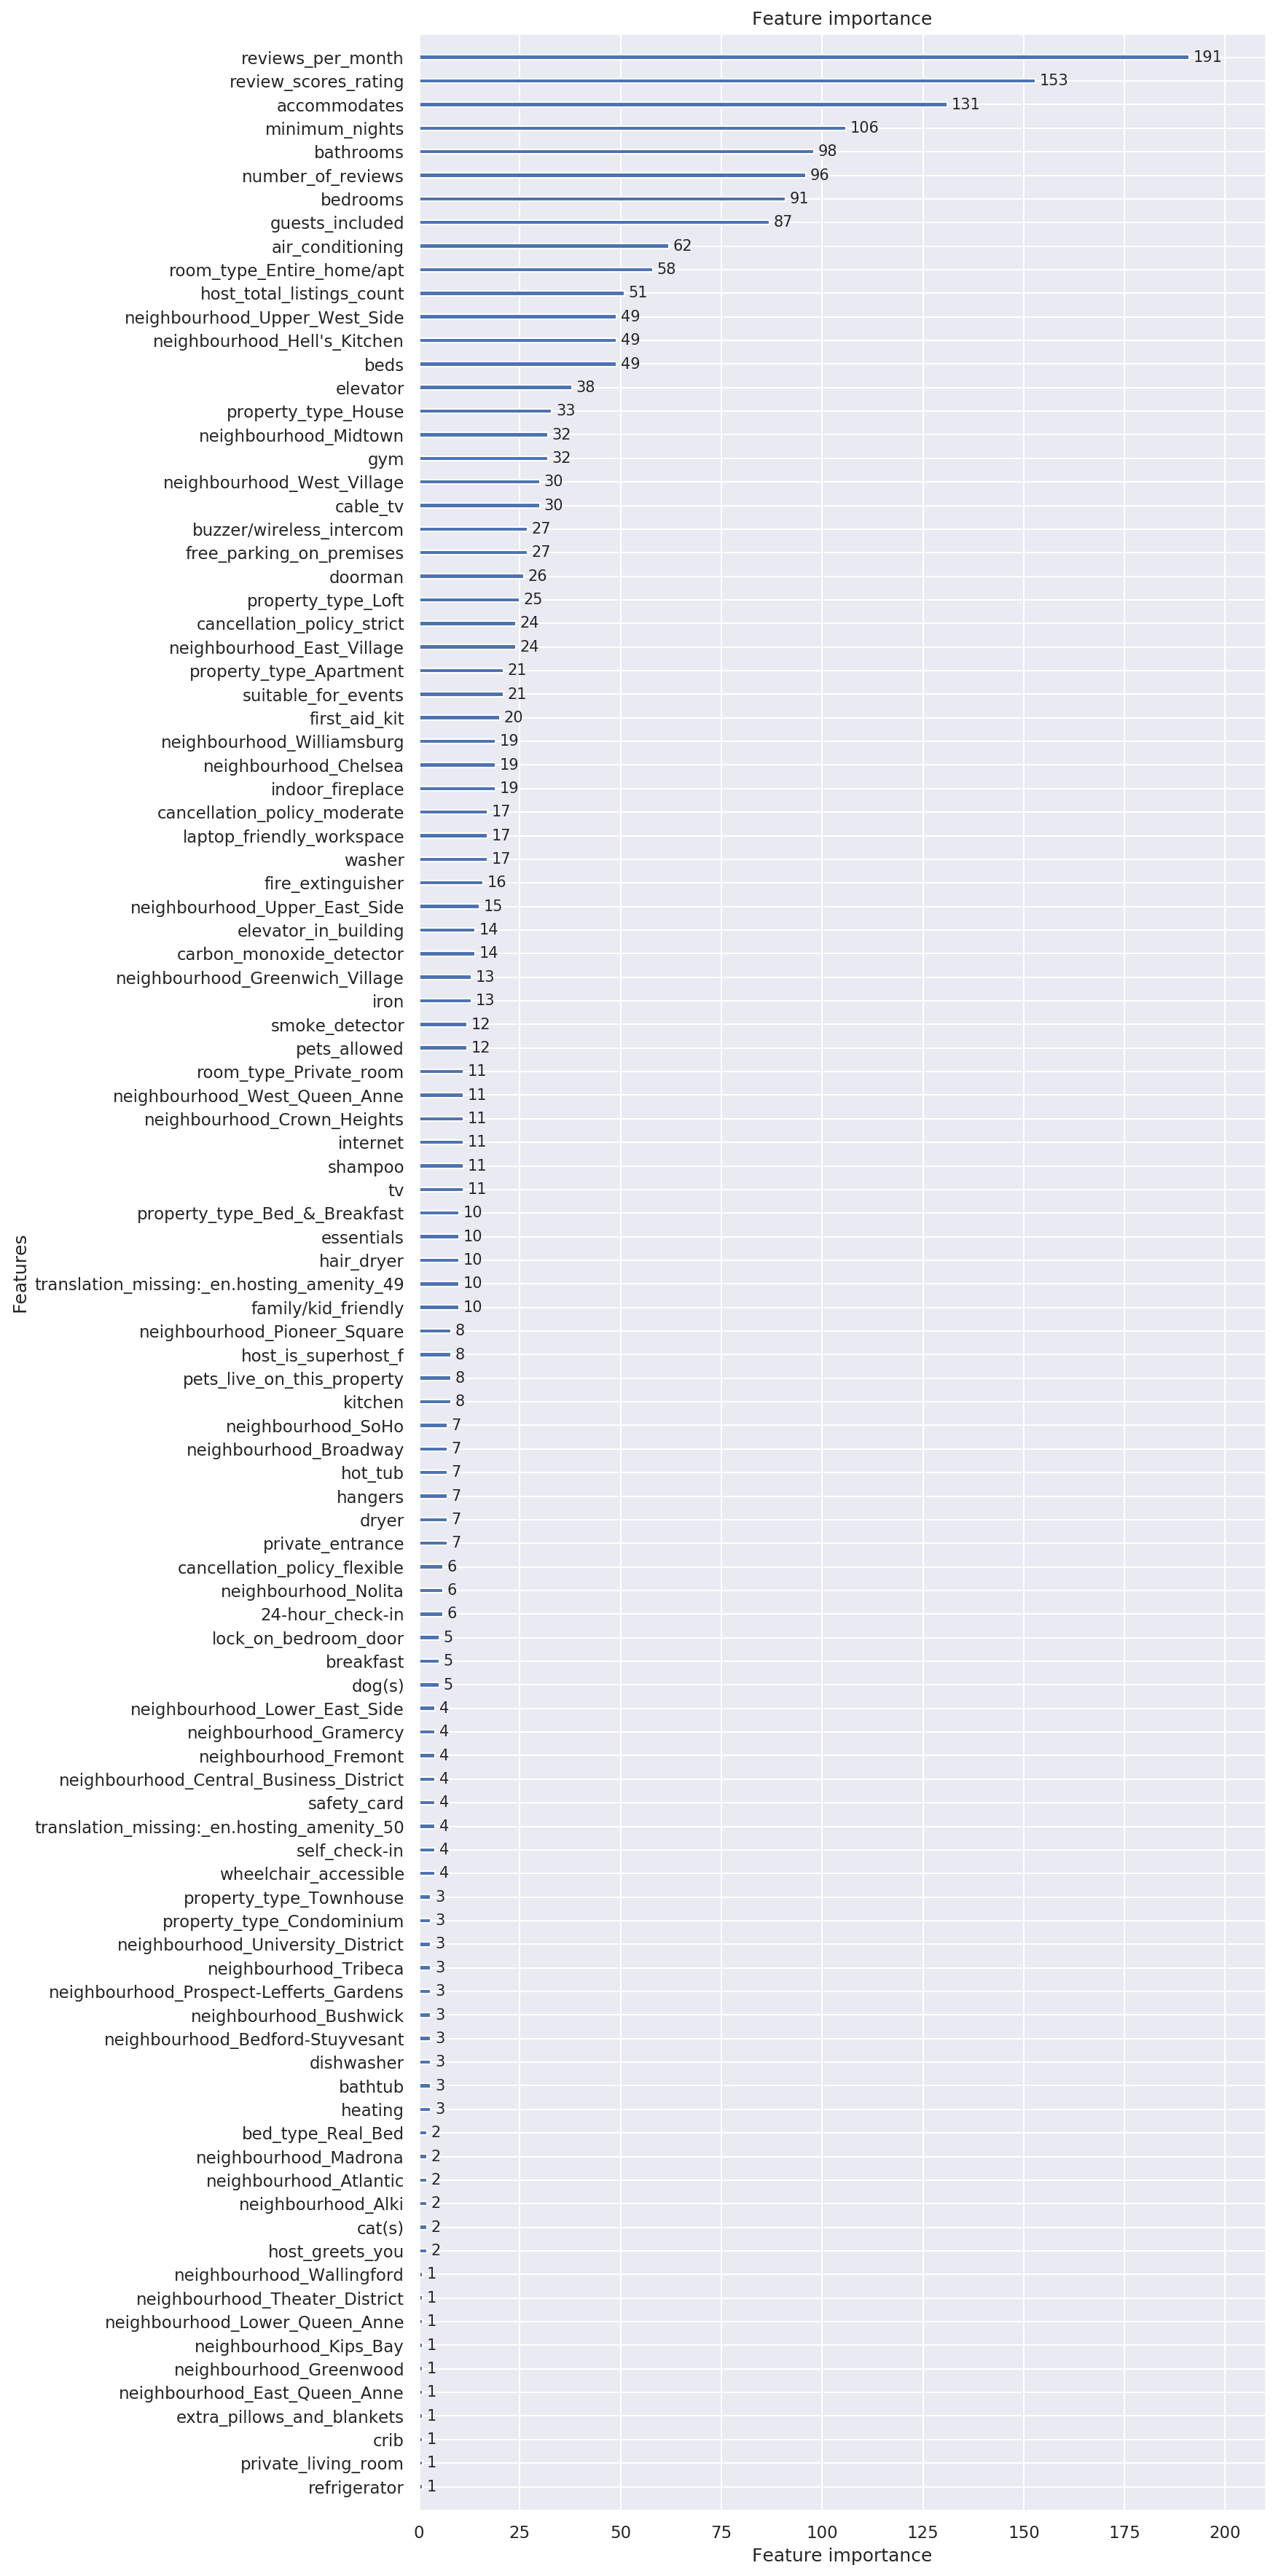

In [164]:
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,30), dpi=150)
lgb.plot_importance(gbm, ax=ax)
fig.savefig('feature_importance.png')